# 1、什么是梯度下降法

引入：上一章，我们学习了多元线性回归的拟合，我们在拟合的过程中，使用了正规方程的方法，通过数学公式求解了回归系数。但是这样的做法时间复杂度高，且不具有普适性，那么在这一章，我们就来学习一种时间复杂度较低，并且是绝大多数机器学习算法都采用的一种最优化搜索的方法：梯度下降法。

## 什么是梯度下降法

梯度告诉了我们如何从当前位置快速地达到附近的极大值点（当函数是凸函数或者凹函数的时候，极值点是最值点）。梯度下降法就告诉我们如何从当前位置快速地到达附近的极小值点。

+ 这一部分知识在绝大多数的《高等数学》教程中都有介绍，梯度方向是函数值增大变化最快的方向。

当然，我们从起始点走到目标点，一般情况下不是走直线，我们很可能是弯弯曲曲来到极值点。

如何刻画这件事情呢？
（1）往哪个方向走。由梯度控制。
（2）走多远。梯度也能度量走多远，但是为了控制走多远，我们引入了学习率这个概念。

梯度下降上升算法是一个搜索算法，它不是一下子让我们走到函数的极值点。

## 梯度下降法终止的条件
1、循环次数已经足够大（n_iters 是一个比较大的数，例如 1e4）；
2、相邻两次的函数值差距已经非常小了（epsilon 是一个非常小的数，例如：1e-8）（**注意：这个条件在梯度下降法的变种随机梯度下降法中不适用**）。


## 关于学习率的解释：
1. $\eta$ 称为学习率(learning rate)；
2. $\eta$ 的取值影响获得最优解的速度；
3. $\eta$ 取值不合适，甚至得不到最优解；
4. $\eta$ 是梯度下降法的一个超参数。


## 梯度下降法的迭代公式


# 2、模拟实现梯度下降法

例：

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.5)**2 - 1

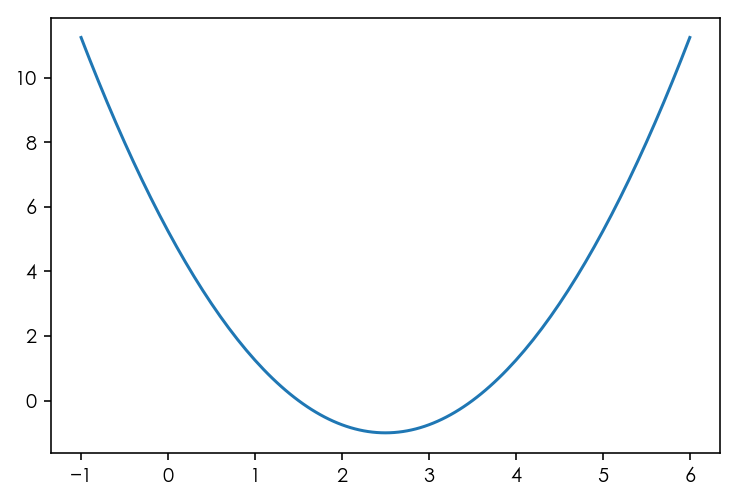

In [2]:
plt.plot(plot_x, plot_y)
plt.show()

+ 定义目标函数：

$$
y = (x - 2.5)^2 - 1
$$

In [3]:
def J(theta):
    return (theta - 2.5)**2 - 1

+ 目标函数的梯度函数：

$$
y = 2(x - 2.5)
$$

In [5]:
def dJ(theta):
    return 2 * (theta - 2.5)

In [6]:
eta = 0.1  # 学习率
epsilon = 1e-8

theta = 0.0  # 初始点
while True:
    gradient = dJ(theta)
    last_theta = theta
    # theta 的迭代的式子
    theta = theta - eta * gradient

    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


下面，我们记录一下 theta 的变化过程。

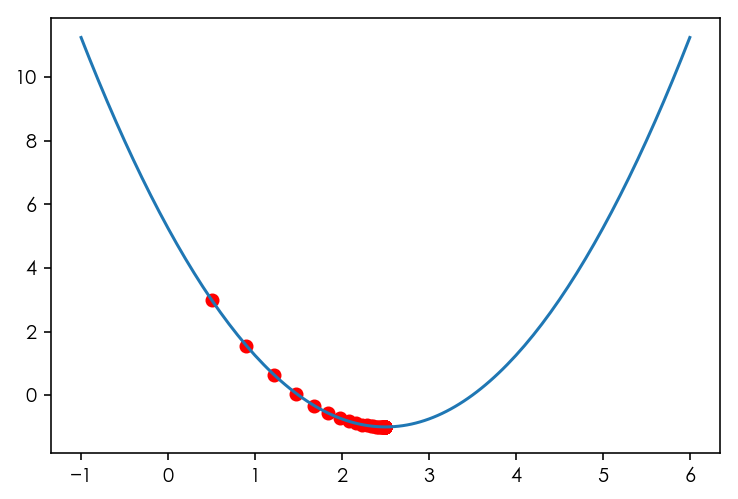

In [7]:
eta = 0.1  # 学习率
epsilon = 1e-8
theta_history = []

theta = 0.0  # 初始点
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

plt.plot(plot_x, plot_y)
plt.scatter(np.array(theta_history), J(np.array(theta_history)), color='r')
plt.show()

In [20]:
len(theta_history)

45

接下来，我们把上面的过程封装到一个方法中。 

In [40]:
def gradient_descent(initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        if (abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iter += 1


def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r')
    plt.show()

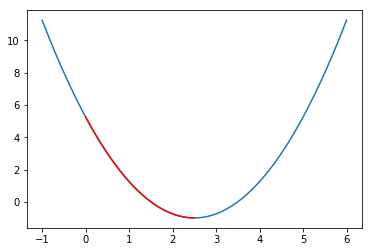

In [34]:
eta = 0.01
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [35]:
len(theta_history)

424

减小学习率

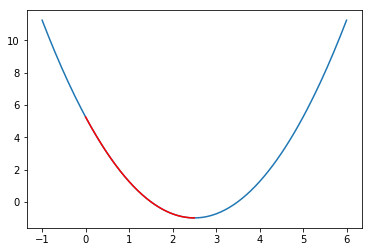

In [36]:
eta = 0.001
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [37]:
len(theta_history)

3682

增加学习率

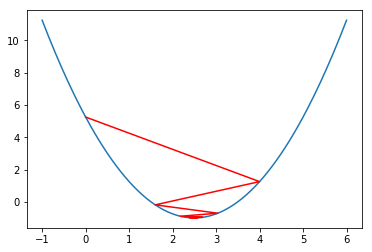

In [38]:
eta = 0.8
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

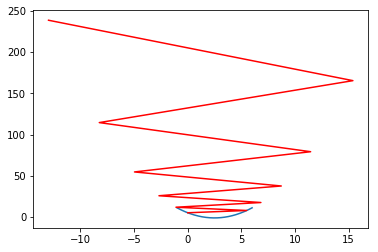

In [42]:
eta = 1.1
theta_history = []
gradient_descent(0., eta, n_iters=10)
plot_theta_history()